随机森林

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

e_number= np.arange(10, 200, 10)
y_face=[]


#加载数据
face_Xtrain = np.load('trainDistance.npy')    #128维人脸特征，训练集
face_ytrain = np.load('DR_sex_map.npy')    #人脸训练集，性别标签，男1女0
face_Xtest = np.load('testDistance.npy')    #128维人脸特征，测试集
face_ytest = np.load('DS_sex_map.npy')    #人脸测试集标签，性别标签，男1女0


for i in e_number:
#建立模型
    rf = RandomForestClassifier(n_estimators=50, random_state=42)

#训练模型
    rf.fit(face_Xtrain, face_ytrain)

#预测结果
    y_pred = rf.predict(face_Xtest)

#模型评估
    from sklearn.metrics import accuracy_score
    
    print("n=%d模型准确率：" %i,accuracy_score(face_ytest, y_pred))
    y_face.append(accuracy_score(face_ytest, y_pred))


n=10模型准确率： 0.8937875751503006
n=20模型准确率： 0.8937875751503006
n=30模型准确率： 0.8937875751503006
n=40模型准确率： 0.8937875751503006
n=50模型准确率： 0.8937875751503006
n=60模型准确率： 0.8937875751503006
n=70模型准确率： 0.8937875751503006
n=80模型准确率： 0.8937875751503006
n=90模型准确率： 0.8937875751503006
n=100模型准确率： 0.8937875751503006
n=110模型准确率： 0.8937875751503006
n=120模型准确率： 0.8937875751503006
n=130模型准确率： 0.8937875751503006
n=140模型准确率： 0.8937875751503006
n=150模型准确率： 0.8937875751503006
n=160模型准确率： 0.8937875751503006
n=170模型准确率： 0.8937875751503006
n=180模型准确率： 0.8937875751503006
n=190模型准确率： 0.8937875751503006


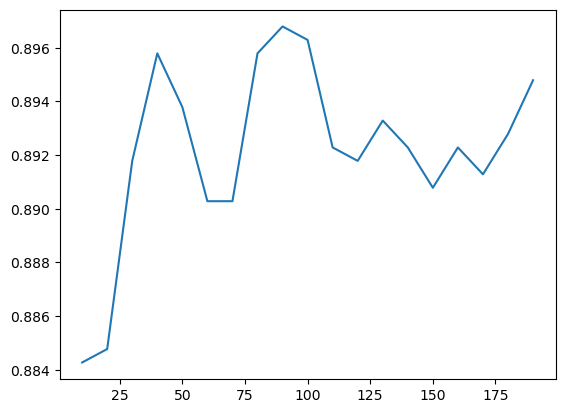

In [4]:
plt.plot(e_number, y_face)

随机森林第二种测试法

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(rf, face_Xtest, face_ytest, cv=5, scoring='accuracy')
print('RandomForest accuracy：',scores.mean())

RandomForest accuracy： 0.8907882205513784


单决策树对比

In [11]:
#单个决策树
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier


#单个分类器
clf_tree = tree.DecisionTreeClassifier(criterion="entropy")
scores = cross_val_score(clf_tree, face_Xtest, face_ytest, cv=5, scoring='accuracy')

clf_tree.fit(face_Xtrain,face_ytrain)
y_pred=clf_tree.predict(face_Xtest)
print("单个决策树模型准确率：", accuracy_score(face_ytest, y_pred))


单个决策树模型准确率： 0.8096192384769539


In [3]:
#单个SVM
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

#单个分类器
clf_svc = SVC(kernel='rbf', probability=True)
scores = cross_val_score(clf_svc, face_Xtest, face_ytest, cv=5, scoring='accuracy')
print('单个SVM accuracy',scores.mean())

单个SVM accuracy 0.9303596491228069


AdaBoost算法

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

y_Adaface=[]
e_number= np.arange(10, 400, 10)
base_clf = SVC(kernel='rbf', probability=True)

for i in e_number:
    adaboost = AdaBoostClassifier(n_estimators=i)
    scores = cross_val_score(adaboost, face_Xtest, face_ytest, cv=5, scoring='accuracy')
    #print('Adaboost accuracy：',scores.mean())
    y_Adaface.append(scores.mean())

In [7]:
e_number= np.arange(10, 400, 10)
y_Adaface=[]
for i in e_number:
#建立模型
    Ada = AdaBoostClassifier(n_estimators=i)

#训练模型
    Ada.fit(face_Xtrain, face_ytrain)

#预测结果
    y_pred = Ada.predict(face_Xtest)

#模型评估
    from sklearn.metrics import accuracy_score
    
    print("n=%d模型准确率：" %i,accuracy_score(face_ytest, y_pred))
    y_Adaface.append(accuracy_score(face_ytest, y_pred))

n=10模型准确率： 0.8376753507014028
n=20模型准确率： 0.875250501002004
n=30模型准确率： 0.8777555110220441
n=40模型准确率： 0.8822645290581163
n=50模型准确率： 0.8862725450901804
n=60模型准确率： 0.8892785571142284
n=70模型准确率： 0.8887775551102205
n=80模型准确率： 0.8892785571142284
n=90模型准确率： 0.8932865731462926
n=100模型准确率： 0.8982965931863728
n=110模型准确率： 0.8942885771543087
n=120模型准确率： 0.8902805611222445
n=130模型准确率： 0.8957915831663327
n=140模型准确率： 0.8957915831663327
n=150模型准确率： 0.9003006012024048
n=160模型准确率： 0.8927855711422845
n=170模型准确率： 0.8917835671342685
n=180模型准确率： 0.8922845691382766
n=190模型准确率： 0.8942885771543087
n=200模型准确率： 0.8932865731462926
n=210模型准确率： 0.8932865731462926
n=220模型准确率： 0.8942885771543087
n=230模型准确率： 0.8892785571142284
n=240模型准确率： 0.8912825651302605
n=250模型准确率： 0.8922845691382766
n=260模型准确率： 0.8952905811623246
n=270模型准确率： 0.8957915831663327
n=280模型准确率： 0.8972945891783567
n=290模型准确率： 0.8952905811623246
n=300模型准确率： 0.8957915831663327
n=310模型准确率： 0.8977955911823647
n=320模型准确率： 0.8967935871743486
n=330模型准确率： 0.8962

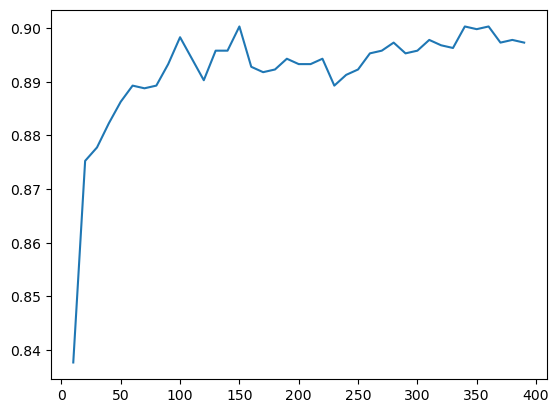

In [24]:
plt.plot(e_number,y_Adaface)